# Conclusion
## Findings
- Generally crime amount is going down.  
- The proportion of some types of crime are going down, such as Narcotics and Burglary.  
- The proportion of some types of crime are going up, such as Assault, motor vehicle theft and Theft.  

## Analysis
- When arresting rate goes down, the proportion of this type of crime goes up, such as Assault, motor vehicle theft and Theft.  
- When arresting rate are keeping high, the proportion of this type of crime goes down, such as Narcotics and Burglary.  
- Crime amount in downtown is high in downtown. 

## Suggestion
- Being more strict to criminals will help stop crime.  
- Send more police officers to downtown

# Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/var/folders/hk/p7fcnhm10z92trzs_9kwqlyr0000gn/T/ipykernel_36740/4161972744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv('chicago_crime_dataset_v2.csv')


In [5]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691209 entries, 0 to 7691208
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

# Analysis

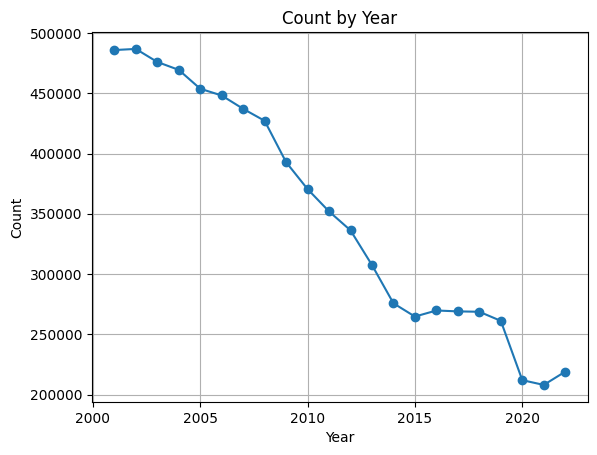

In [7]:
# 按年份进行分组，并计算每个年份的数量
grouped = data.groupby('Year').size()

# 绘制折线图
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count by Year')
plt.grid(True)
plt.show()

We can see that amount of crime generally goes down.  
Then let's see the trend of every single crime type.

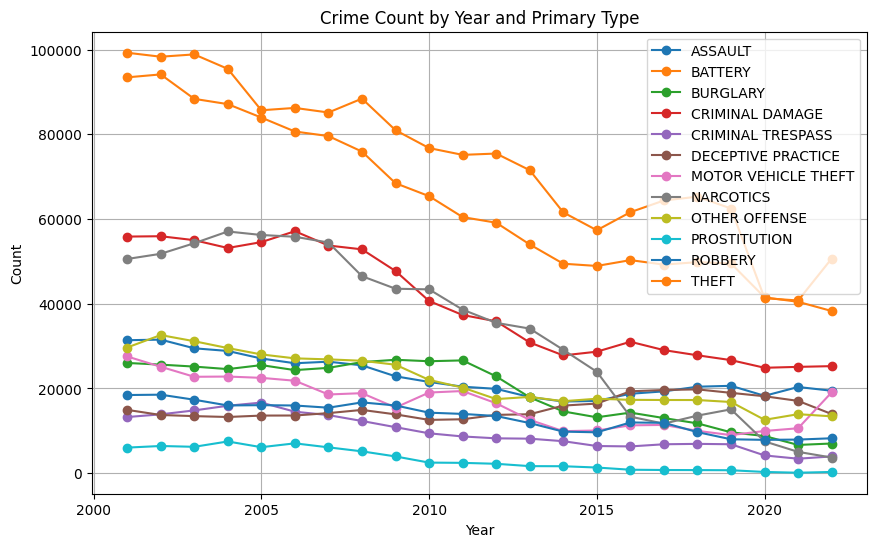

In [8]:
# 按照'Year'和'Primary Type'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in grouped.columns:
    if grouped[primary_type].values[0] < 5000:
        continue
    plt.plot(grouped.index, grouped[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Count by Year and Primary Type')
plt.legend()
plt.grid(True)
plt.show()

We can see that generally every crime is going down except motor vehicle theft.  
Then let's see percentage of each type of crime.

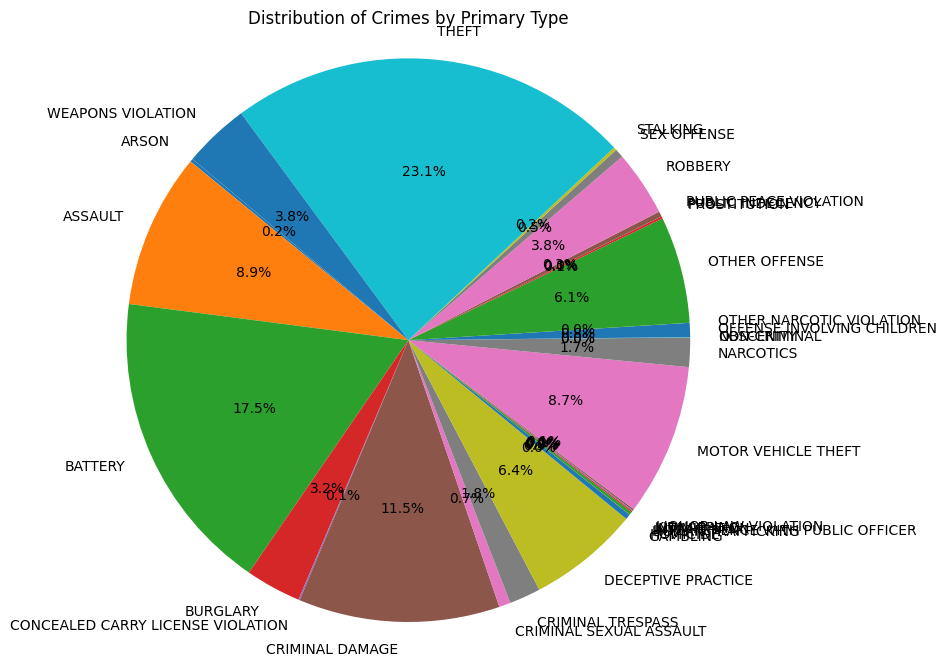

In [9]:
# 按'Primary Type'进行分组，并计算每个组的大小
grouped = data[data.Year==2022].groupby('Primary Type').size()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 保持圆形
plt.title('Distribution of Crimes by Primary Type')
plt.show()

TOP_5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSULT', 'MOTOR VEHICLE THEFT']

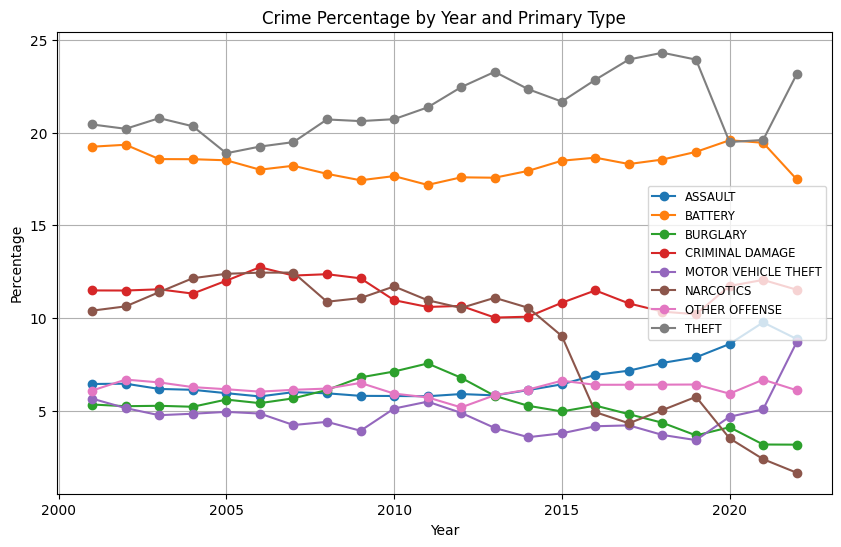

In [11]:
# 按照'Year'和'Primary Type'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    if percentages[primary_type].values[0] < 5:
        continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Primary Type')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

Now, some interesting results appear.  
Assault, motor vehicle theft and Theft are going up.  
Narcotics and Burglary are significantly going down. 

Then, let's explore whether arresting is a good method to stop crime.

### THEFT

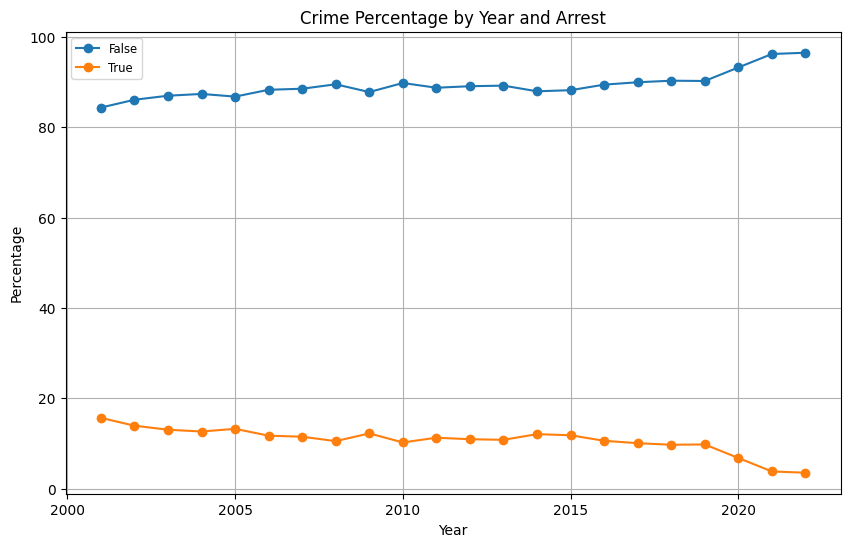

In [13]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='THEFT'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

### ASSAULT

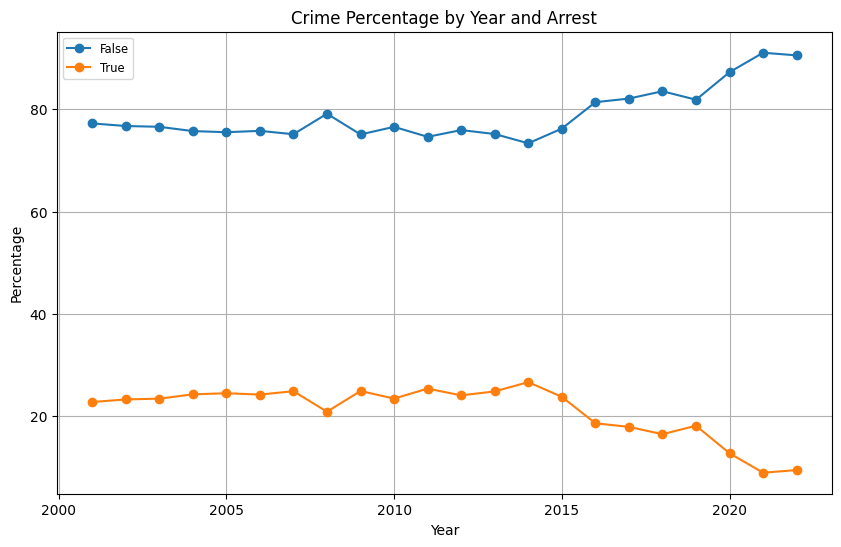

In [14]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='ASSAULT'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

### MOTOR VEHICLE THEFT

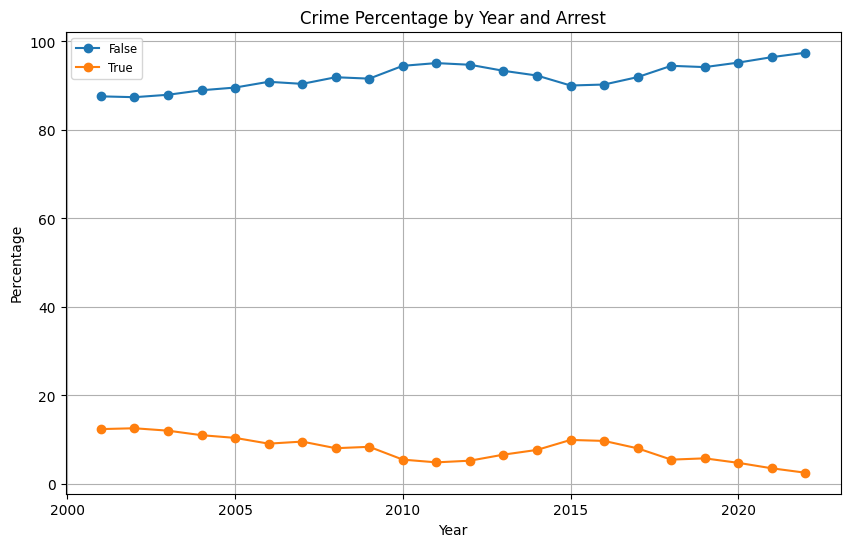

In [15]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='MOTOR VEHICLE THEFT'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

### NARCOTICS

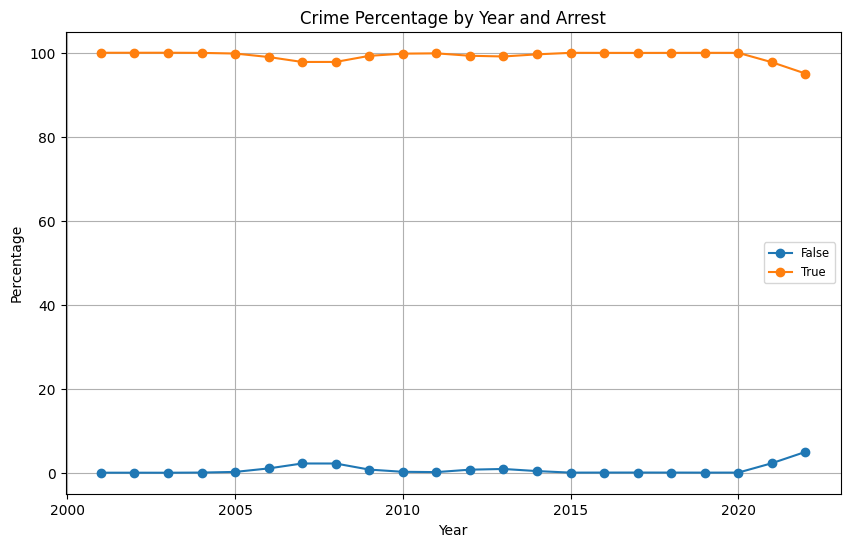

In [16]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='NARCOTICS'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

### BURGLARY

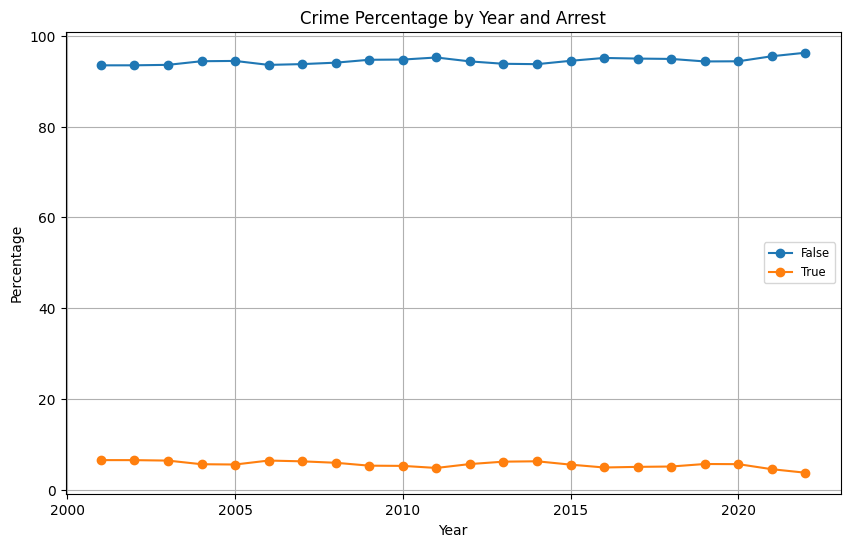

In [17]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='BURGLARY'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

Now we can see that Narcotics and Burglary both have strict punishment and they keeps going down.  
For Assault, motor vehicle theft and Theft, there percentage goes up because their arresting rates are going down.  

So, arresting seems to be important to stop crime. 

Then let's explore some data on map.  

In [18]:
import folium
from folium.plugins import HeatMap

# 创建一个地图中心为芝加哥市中心的folium地图
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# 获取数据并过滤掉经纬度为空的数据
filtered_data = data[data['Latitude'].notnull()]

# 提取经纬度数据
locations = filtered_data[['Latitude', 'Longitude']][filtered_data.Year==2022].sample(2000)

# 将经纬度数据转换为列表格式
location_list = locations.values.tolist()

# 创建热度图层
heat_map = HeatMap(location_list, radius=15, blur=25)

# 添加热度图层到地图上
chicago_map.add_child(heat_map)

# 显示地图
chicago_map

# Conclusion
## Findings
- Generally crime amount is going down.  
- The proportion of some types of crime are going down, such as Narcotics and Burglary.  
- The proportion of some types of crime are going up, such as Assault, motor vehicle theft and Theft.  

## Analysis
- When arresting rate goes down, the proportion of this type of crime goes up, such as Assault, motor vehicle theft and Theft.  
- When arresting rate are keeping high, the proportion of this type of crime goes down, such as Narcotics and Burglary.  
- Crime amount in downtown is high in downtown. 

## Suggestion
- Being more strict to criminals will help stop crime.  
- Send more police officers to downtown